In [21]:
import pandas as pd
house_ds = pd.read_csv("Housing.csv")

In [22]:
house_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house_ds["guestroom_binary"] = le.fit_transform(house_ds["guestroom"])
house_ds["mainroad_binary"] = le.fit_transform(house_ds["mainroad"])
house_ds["basement_binary"] = le.fit_transform(house_ds["basement"])
house_ds["hotwaterheating_binary"] = le.fit_transform(house_ds["hotwaterheating"])
house_ds["airconditioning_binary"] = le.fit_transform(house_ds["airconditioning"])
house_ds["prefarea_binary"] = le.fit_transform(house_ds["prefarea"])

In [24]:
house_ds=house_ds.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"],axis=1)

In [25]:
house_ds=house_ds.join(pd.get_dummies(house_ds["furnishingstatus"],dtype=int))
house_ds=house_ds.drop("furnishingstatus",axis=1)

In [26]:
house_ds

,price,area,bedrooms,bathrooms,stories,parking,guestroom_binary,mainroad_binary,basement_binary,hotwaterheating_binary,airconditioning_binary,prefarea_binary,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,0,1,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [27]:
house_ds.var()

price                     3.498544e+12
area                      4.709512e+06
bedrooms                  5.447383e-01
bathrooms                 2.524757e-01
stories                   7.525432e-01
parking                   7.423300e-01
guestroom_binary          1.465731e-01
mainroad_binary           1.215461e-01
basement_binary           2.280559e-01
hotwaterheating_binary    4.384781e-02
airconditioning_binary    2.163923e-01
prefarea_binary           1.800324e-01
furnished                 1.912439e-01
semi-furnished            2.434768e-01
unfurnished               2.203386e-01
dtype: float64

In [28]:
X=house_ds.drop("price",axis=1)
y=house_ds["price"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor()

In [30]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
print("normal score func = " + str(knn.score(X_test,y_test)))

normal score func = 0.3326235147346389


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaledStd = scaler.fit_transform(X_train)
X_test_scaledStd = scaler.transform(X_test)
knn.fit(X_train_scaledStd,y_train)
print("stabdard scaker score func = " + str(knn.score(X_test_scaledStd,y_test)))

stabdard scaker score func = 0.6216966907068884


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaledMinMax = scaler.fit_transform(X_train)
X_test_scaledMinMax = scaler.fit_transform(X_test)
knn.fit(X_train_scaledMinMax,y_train)
print("min max scaler score func = " + str(knn.score(X_test_scaledMinMax,y_test)))

min max scaler score func = 0.5237644767408506


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 
train_accuracies = {}
test_accuracies = {}
rmse_knn_arr = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    y_pred=knn.predict(X_test)
    mse_knn= MSE(y_test, y_pred)
    rmse_knn = mse_knn**(1/2)
    rmse_knn_arr[neighbor]=rmse_knn

print(rmse_knn_arr)
print(test_accuracies)

{1: 2036885.135315883, 2: 1846697.1320039083, 3: 1801978.3001147457, 4: 1800450.063539543, 5: 1753692.0511535523, 6: 1764925.768882617, 7: 1774579.2844373041, 8: 1813673.1541201961, 9: 1807792.2946808273, 10: 1791396.7559625516, 11: 1811920.0101430432, 12: 1824974.7394422702, 13: 1823922.731198477, 14: 1834533.0264592923, 15: 1826459.603864705, 16: 1836464.7787686384, 17: 1825730.4123128096, 18: 1841165.8916844893, 19: 1843136.3373248284, 20: 1837270.5274376876, 21: 1836770.3149821414, 22: 1835796.2631962823, 23: 1835557.752492485, 24: 1832188.8094247894, 25: 1840338.415520419}
{1: 0.09967914329671956, 2: 0.2599593381939598, 3: 0.29536640224207455, 4: 0.2965610783439808, 5: 0.3326235147346389, 6: 0.32404603227967155, 7: 0.316631354700886, 8: 0.2861905672261901, 9: 0.2908121355598653, 10: 0.30361757785742416, 11: 0.28756987405650425, 12: 0.27726689452254005, 13: 0.2780998945906499, 14: 0.2696764541327151, 15: 0.2760903332990856, 16: 0.2681375916972806, 17: 0.2766682419915183, 18: 0.2643

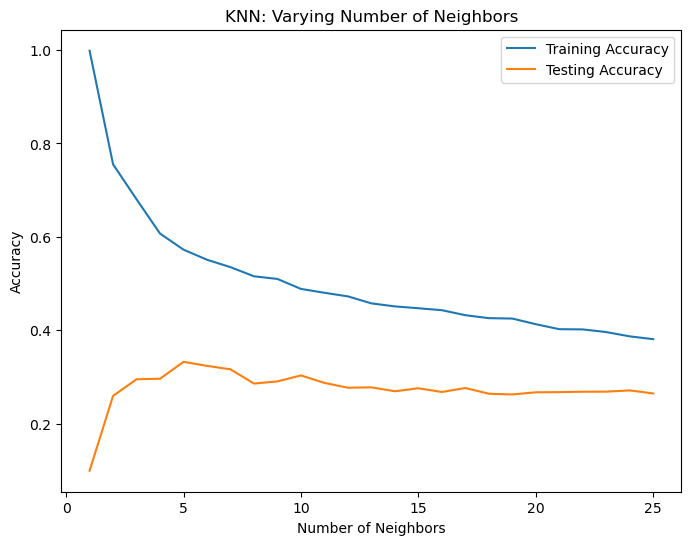

In [34]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 
train_accuracies = {}
test_accuracies = {}
rmse_knn_arr = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(X_train_scaledStd, y_train)
    train_accuracies[neighbor] = knn.score(X_train_scaledStd, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaledStd, y_test)
    y_pred=knn.predict(X_test_scaledStd)
    mse_knn= MSE(y_test, y_pred)
    rmse_knn = mse_knn**(1/2)
    rmse_knn_arr[neighbor]=rmse_knn

print(rmse_knn_arr)
print(test_accuracies)

{1: 1638079.187010664, 2: 1396978.8375127213, 3: 1352921.1483577758, 4: 1377222.0733305125, 5: 1320346.6062114974, 6: 1339262.2043571703, 7: 1339956.1383444092, 8: 1348087.59792981, 9: 1349130.320224208, 10: 1354202.7728813726, 11: 1372092.5782899135, 12: 1353515.5244531368, 13: 1351237.022332294, 14: 1354658.2320198016, 15: 1356841.2468521616, 16: 1365554.8789627498, 17: 1369057.7845544475, 18: 1378885.6214674865, 19: 1389884.1375168185, 20: 1384082.9625286656, 21: 1389523.7647235359, 22: 1393870.2139934057, 23: 1400425.4312935725, 24: 1408046.3696906574, 25: 1413427.4158259686}
{1: 0.4177171244147476, 2: 0.5765092900498132, 3: 0.6028000322545009, 4: 0.5884030168783512, 5: 0.6216966907068884, 6: 0.6107797217479778, 7: 0.6103762710231879, 8: 0.6056330968568076, 9: 0.6050227890450639, 10: 0.6020471393939884, 11: 0.5914633118888135, 12: 0.6024509534839899, 13: 0.6037882915575254, 14: 0.6017794073367447, 15: 0.6004949181717113, 16: 0.5953471998871313, 17: 0.5932685158228084, 18: 0.5874080

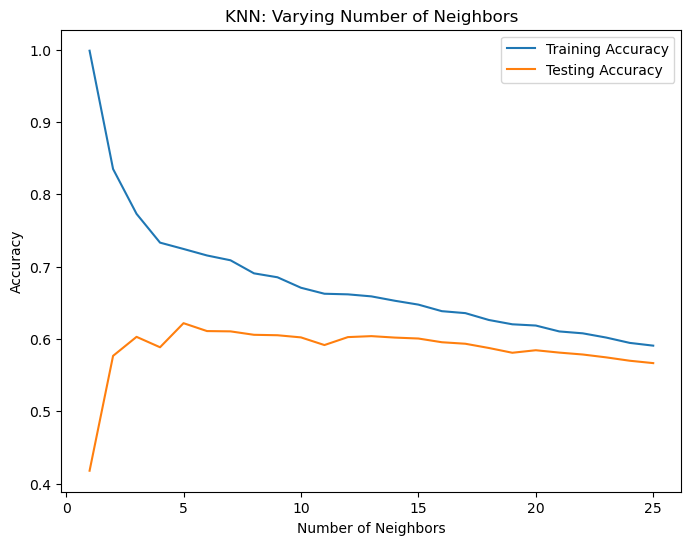

In [36]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [37]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaledStd, y_train)
from sklearn.model_selection import cross_val_score
knn_cv_scores = cross_val_score(knn, X_train_scaledStd, y_train, cv=5)
print(np.mean(knn_cv_scores))
print(knn_cv_scores)
knn.score(X_test_scaledStd, y_test)
y_pred=knn.predict(X_test_scaledStd)
mse_knn= MSE(y_test, y_pred)
rmse_knn = mse_knn**(1/2)
rmse_knn_arr[neighbor]=rmse_knn

0.5335169546788655
[0.4856681  0.27715472 0.76805834 0.57787244 0.55883118]


In [38]:
from sklearn.metrics import mean_squared_error as MSE
y_pred=knn.predict(X_test)
mse_knn= MSE(y_test, y_pred)
rmse_knn = mse_knn**(1/2)
print(rmse_knn)

2602759.191342994


h:\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
